In [1]:
import networkx as nx
import numpy as np; np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate

from simulate import ODE_simulate, GILL_simulate
from plot_module import plot_ODE, plot_gillespie, plot_network
from sim_param_from_network import names_from_network, gillespie_param_from_network, dataframes_from_network, ODE_from_network
from network_generate import network_gen_chain, network_gen_ring, network_gen_powlaw_tree

import libgillespie

In [18]:
TIME_POINTS = np.linspace(0, 1000, 1001)

repl = 100
n_nodes = 7
start_pop = [100, 10]

SOMA_CB = 0.5
SOMA_BR = 0.4
SOMA_NSS = 100
SOMA_DIFFUSION = 0.1

DELTA = 0.5
TURNOVER = 0.4


AXON_TRNSP_ANT = 1.5
AXON_TRNSP_RET = 1.1

bio_param = {'soma_cb':SOMA_CB, 'soma_br':SOMA_BR, 'soma_nss':SOMA_NSS, 'delta':DELTA, 'turnover':TURNOVER, 'soma_diffusion':SOMA_DIFFUSION}

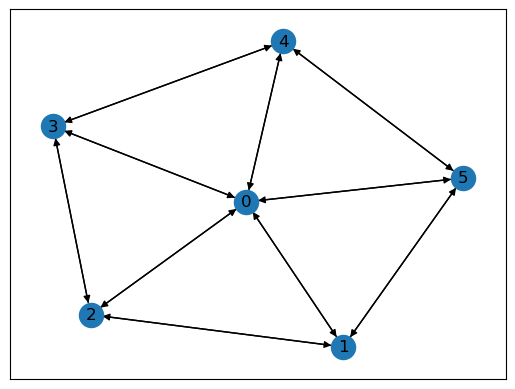

In [19]:
N_NODES = 6
G = nx.wheel_graph(N_NODES)
G = G.to_directed()
nx.draw_networkx(G)

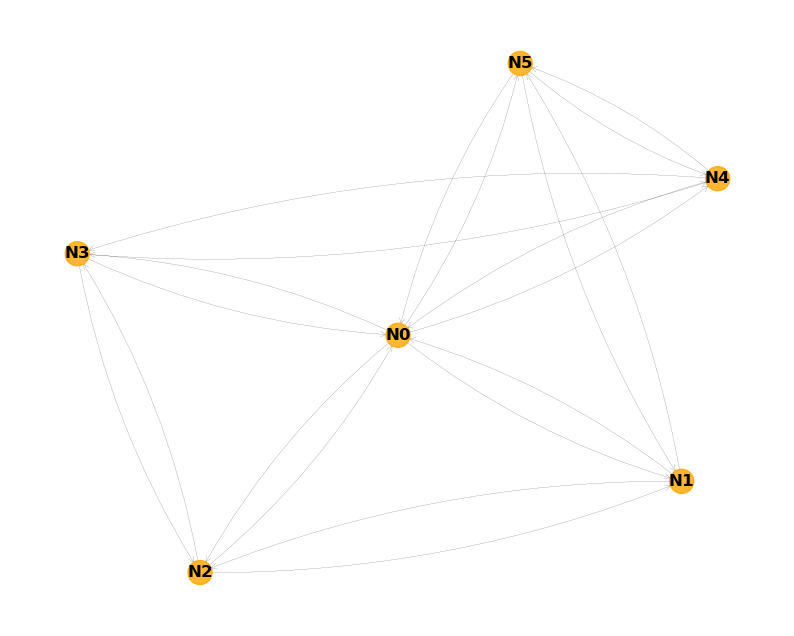

In [20]:
nx.set_node_attributes(G, 2, "birth_type")
nx.set_node_attributes(G, float(bio_param['soma_cb']), "c_b")
nx.set_node_attributes(G, float(bio_param['soma_br']), "birth_rate")
nx.set_node_attributes(G, float(bio_param['turnover']), "death_rate")
nx.set_node_attributes(G, float(bio_param['soma_nss']), "nss")
nx.set_node_attributes(G, float(bio_param['delta']), "delta")
nx.set_edge_attributes(G, float(bio_param['soma_diffusion']), "rate")
rename_dict = {i:f'N{i}' for i in range(N_NODES)}
nx.relabel_nodes(G, rename_dict, copy=False)
plot_network(G)

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	N0_wt, N0_mt, N1_wt, N1_mt, N2_wt, N2_mt, N3_wt, N3_mt, N4_wt, N4_mt, N5_wt, N5_mt = z
	return [
		# ΔN0_wt/Δt
		(N0_wt*((0.4 + 0.5*(100-N0_wt-(0.5*N0_mt)))-(0.4)-(0.5)))+(N1_wt*0.1)+(N2_wt*0.1)+(N3_wt*0.1)+(N4_wt*0.1)+(N5_wt*0.1),
		# ΔN0_mt/Δt
		(N0_mt*((0.4 + 0.5*(100-N0_wt-(0.5*N0_mt)))-(0.4)-(0.5)))+(N1_mt*0.1)+(N2_mt*0.1)+(N3_mt*0.1)+(N4_mt*0.1)+(N5_mt*0.1),
		# ΔN1_wt/Δt
		(N1_wt*((0.4 + 0.5*(100-N1_wt-(0.5*N1_mt)))-(0.4)-(0.3)))+(N0_wt*0.1)+(N2_wt*0.1)+(N5_wt*0.1),
		# ΔN1_mt/Δt
		(N1_mt*((0.4 + 0.5*(100-N1_wt-(0.5*N1_mt)))-(0.4)-(0.3)))+(N0_mt*0.1)+(N2_mt*0.1)+(N5_mt*0.1),
		# ΔN2_wt/Δt
		(N2_wt*((0.4 + 0.5*(100-N2_wt-(0.5*N2_mt)))-(0.4)-(0.3)))+(N0_wt*0.1)+(N1_wt*0.1)+(N3_wt*0.1),
		# ΔN2_mt/Δt
		(N2_mt*((0.4 + 0.5*(100-N2_wt-(0.5*N2_mt)))-(0.4)-(0.3)))+(N0_mt*0.1)+(N1_mt*0.1)+(N3_mt*0.1),
		# ΔN3_wt/Δt
		(N3_wt*((0.4 + 0.5*(100-N3_wt-(0.5*N3_mt)))-(0.4)-(0.3)))+(N0_wt*0.1)+(N2_wt*

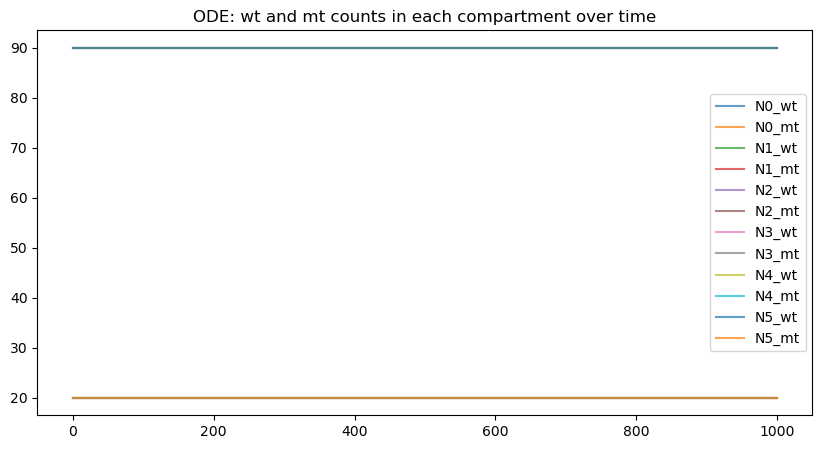

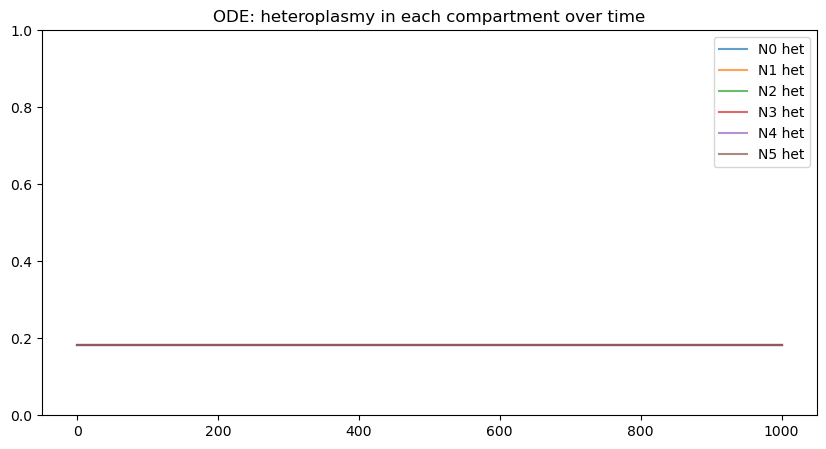

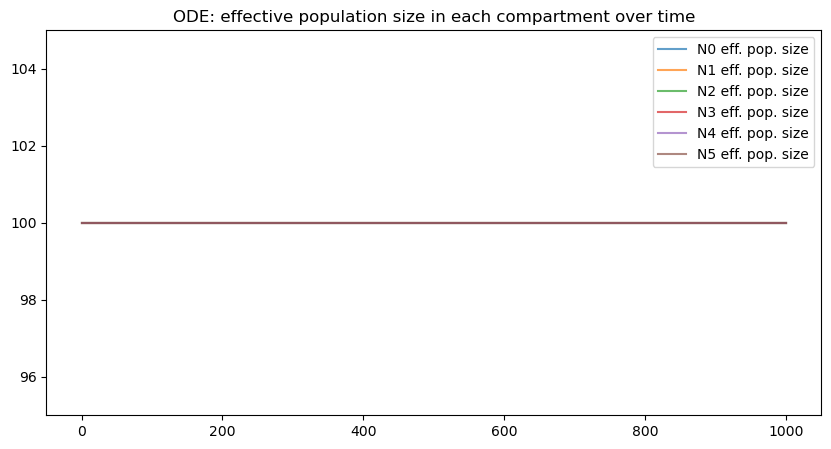

> Final counts of mt and wt in each compartment:
N0_wt	90.0	
N0_mt	20.0	
N1_wt	90.0	
N1_mt	20.0	
N2_wt	90.0	
N2_mt	20.0	
N3_wt	90.0	
N3_mt	20.0	
N4_wt	90.0	
N4_mt	20.0	
N5_wt	90.0	
N5_mt	20.0	

> Final effective population sizes in each compartment:
N0	100.0	
N1	100.0	
N2	100.0	
N3	100.0	
N4	100.0	
N5	100.0	


In [21]:
VARS, COMP = names_from_network(G)
START_STATE = []
for i in range(N_NODES):
    START_STATE.append(90)
    START_STATE.append(20)

ODE_model = ODE_from_network(G)
plot_ODE(ODE_simulate(ODE_model, TIME_POINTS, START_STATE), TIME_POINTS, DELTA, VARS, COMP)


>> Gillespie simulation parameters:

> Reactions:
react.#	state i	type	rate	update to system
0	0	birth	-1	[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1	1	birth	-1	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2	2	birth	-1	[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3	3	birth	-1	[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
4	4	birth	-1	[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
5	5	birth	-1	[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
6	6	birth	-1	[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
7	7	birth	-1	[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
8	8	birth	-1	[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
9	9	birth	-1	[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
10	10	birth	-1	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
11	11	birth	-1	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
12	0	death	0.4	[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
13	1	death	0.4	[0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
14	2	death	0.4	[0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15	3	death	0.4	[0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
16	4	death	0.4	[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
17	5	death	0.4	[0, 0, 0, 0, 0, -1, 0,

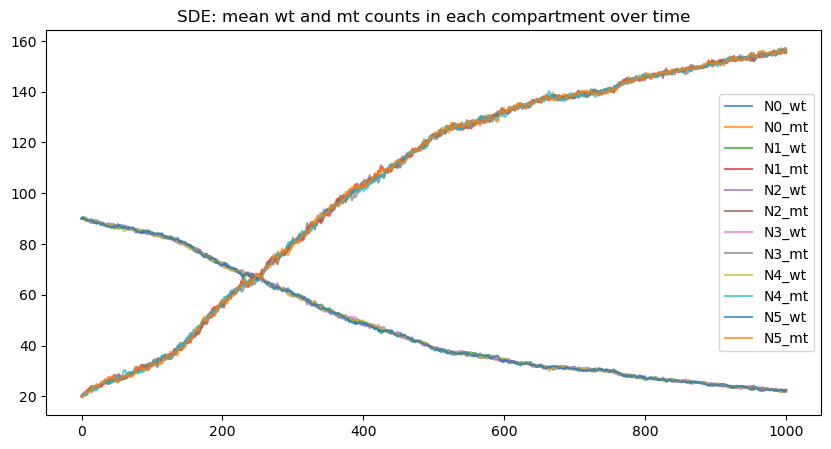

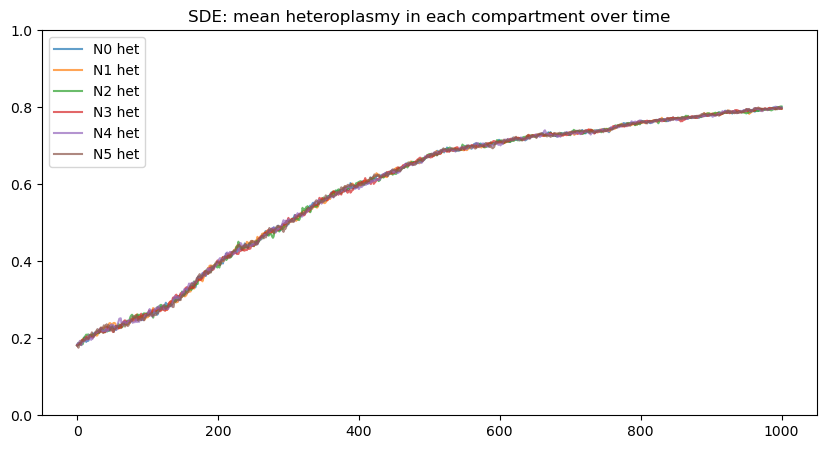

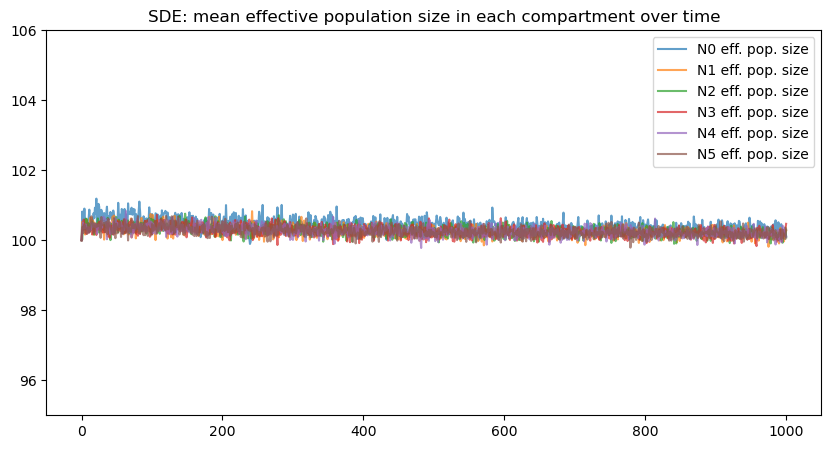

> Final mean counts of mt and wt in each compartment:
N0_wt	22.07	
N0_mt	156.11	
N1_wt	22.65	
N1_mt	155.25	
N2_wt	21.73	
N2_mt	156.7	
N3_wt	22.58	
N3_mt	155.78	
N4_wt	22.12	
N4_mt	155.95	
N5_wt	22.56	
N5_mt	155.48	

> Final mean heteroplasmy in each compartment:
N0	0.7999	
N1	0.7961	
N2	0.8019	
N3	0.7966	
N4	0.7987	
N5	0.7964	

> Final mean effective population sizes in each compartment:
N0	100.125	
N1	100.275	
N2	100.08	
N3	100.47	
N4	100.095	
N5	100.3	

> Change in mean heteroplasmy: 
start: 0.1818
final: 0.7978
delta: 0.6159


In [22]:
GILL_PARAM = gillespie_param_from_network(G)
plot_gillespie(GILL_simulate(GILL_PARAM, TIME_POINTS, START_STATE, repl), TIME_POINTS, DELTA, VARS, COMP)